<a href="https://colab.research.google.com/github/arjun820196/financial_credit_analysis/blob/main/financial_credit_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [46]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# reading file from g-drive and storing file data in variable
data=pd.read_csv(r"/content/gdrive/MyDrive/Learn & Build/loan.csv")

<ipython-input-47-be18e17e1656>:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(r"/content/gdrive/MyDrive/Learn & Build/loan.csv")


In [48]:
# printing data
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# checking dimension of data
np.ndim(data)

2

In [50]:
# checking shape of data
np.shape(data)

(39717, 111)

In [51]:
# checking information of data (rows, columns, data type, etc.)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [52]:
# checking and removing duplicate values if there is any
data.drop_duplicates()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# checking for null values
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [54]:
# description of data (count, mean, standard deviation, min, max, etc)
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [55]:
# making DataFrame for analysis, by only taking important data from datafile

data1=pd.DataFrame()
data1['loan_id']=data['id']
data1['member_id']=data['member_id']
data1['loan_amount']=data['loan_amnt']
data1['funded_amount']=data['funded_amnt']
data1['funded_amnt_inv']=data['funded_amnt_inv']
data1['loan_term']=data['term']
data1['interest_rates']=data['int_rate']
data1['installment']=data['installment']
data1['grade']=data['grade']
data1['sub_grade']=data['sub_grade']
data1['home_ownership']=data['home_ownership']
data1['annual_income']=data['annual_inc']
data1['verification_status']=data['verification_status']
data1['loan_status']=data['loan_status']
data1['pymnt_plan']=data['pymnt_plan']
data1['purpose']=data['purpose']
data1['bankruptcy_record']=data['pub_rec_bankruptcies']
data1['application_type']=data['application_type']


In [56]:
# printing newly formed dataframe
data1

,loan_id,member_id,loan_amount,funded_amount,funded_amnt_inv,loan_term,interest_rates,installment,grade,sub_grade,home_ownership,annual_income,verification_status,loan_status,pymnt_plan,purpose,bankruptcy_record,application_type
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,RENT,24000.0,Verified,Fully Paid,n,credit_card,0.0,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,RENT,30000.0,Source Verified,Charged Off,n,car,0.0,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,RENT,12252.0,Not Verified,Fully Paid,n,small_business,0.0,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,RENT,49200.0,Source Verified,Fully Paid,n,other,0.0,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,RENT,80000.0,Source Verified,Current,n,other,0.0,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,MORTGAGE,110000.0,Not Verified,Fully Paid,n,home_improvement,NaN,INDIVIDUAL
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,RENT,18000.0,Not Verified,Fully Paid,n,credit_card,NaN,INDIVIDUAL
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,MORTGAGE,100000.0,Not Verified,Fully Paid,n,debt_consolidation,NaN,INDIVIDUAL
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,MORTGAGE,200000.0,Not Verified,Fully Paid,n,other,NaN,INDIVIDUAL


In [57]:
# checking dimension of dataframe
np.ndim(data1)

2

In [58]:
# checking shape of dataframe
np.shape(data1)

(39717, 18)

In [59]:
# checking information of data (rows, columns, data type, etc.)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_id              39717 non-null  int64  
 1   member_id            39717 non-null  int64  
 2   loan_amount          39717 non-null  int64  
 3   funded_amount        39717 non-null  int64  
 4   funded_amnt_inv      39717 non-null  float64
 5   loan_term            39717 non-null  object 
 6   interest_rates       39717 non-null  object 
 7   installment          39717 non-null  float64
 8   grade                39717 non-null  object 
 9   sub_grade            39717 non-null  object 
 10  home_ownership       39717 non-null  object 
 11  annual_income        39717 non-null  float64
 12  verification_status  39717 non-null  object 
 13  loan_status          39717 non-null  object 
 14  pymnt_plan           39717 non-null  object 
 15  purpose              39717 non-null 

In [60]:
# checking for null values in dataset
data1.isnull().sum()

loan_id                  0
member_id                0
loan_amount              0
funded_amount            0
funded_amnt_inv          0
loan_term                0
interest_rates           0
installment              0
grade                    0
sub_grade                0
home_ownership           0
annual_income            0
verification_status      0
loan_status              0
pymnt_plan               0
purpose                  0
bankruptcy_record      697
application_type         0
dtype: int64

In [61]:
# Filling null values in dataframe
data1['bankruptcy_record'].fillna(data['pub_rec_bankruptcies'].mean(),inplace=True)

In [62]:
# description of data (count, mean, standard deviation, min, max, etc)
data1.describe()

,loan_id,member_id,loan_amount,funded_amount,funded_amnt_inv,installment,annual_income,bankruptcy_record
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,0.043260
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,0.202523
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,0.000000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,0.000000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,2.000000


In [63]:
## Pie chart for comparing total share of every loan status (fully paid, charged off, current)

<function matplotlib.pyplot.show(close=None, block=None)>

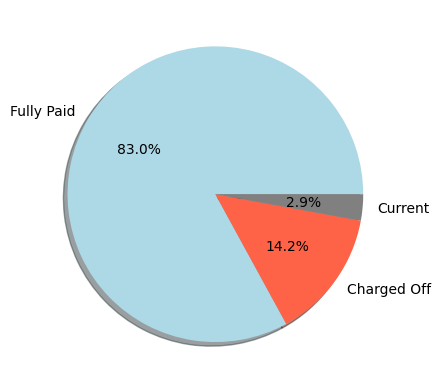

In [64]:
plt.pie(data1['loan_status'].value_counts(), labels=data1['loan_status'].unique(), shadow=True,autopct='%.1f%%', colors=['lightblue','tomato','grey'])
plt.show

In [65]:
## Crosstab ##
## Bankrupcy record of borrower can be a good parameter to decide, wheather loan should be approved or not to the borrower.
## Making Cross Tab for checking, relation beetween Bankrupcy record & Loan status.
## by crosstab we can see, out of total borrowers how many got charged off, fully paid or current with respect to their bankrupcy record.
## so, we can decide on the basis of bankrupcy record, that loan should be aprroved or not.

In [66]:
bankruptcy_loan=pd.crosstab(data1['bankruptcy_record'], data1['loan_status'])
print(bankruptcy_loan)

loan_status        Charged Off  Current  Fully Paid
bankruptcy_record                                  
0.00000                   5141     1101       31097
0.04326                    118        0         579
1.00000                    366       37        1271
2.00000                      2        2           3


In [67]:
'''
0 bankruptcies record = 5141 cherged off & 31097 fully paid. ((5141/31097)*100 = 16.53 % charged off) 1 to 6 ratio approx
1 bankruptcies record = 366 cherged off & 1271 fully paid.   ((366/1271)*100 = 28.79 % charged off) 1 to 3.4 ratio approx
'''

'\n0 bankruptcies record = 5141 cherged off & 31097 fully paid. ((5141/31097)*100 = 16.53 % charged off) 1 to 6 ratio approx\n1 bankruptcies record = 366 cherged off & 1271 fully paid.   ((366/1271)*100 = 28.79 % charged off) 1 to 3.4 ratio approx\n'

In [68]:
## Crosstab ##
## Did borrower live in his own house or on rent ? can give us idea about his expenses on home rent. 
## This can tell us, did borrowers expense on home rent affect the loan repayment or not.
## Making Cross Tab for checking, relation beetween homeownership & Loan status.
## by crosstab we can see, out of total borrowers how many got charged off, fully paid or current with respect to their homeownership status.
## so, we can decide on the basis of homeownership, that loan should be aprroved or not.

In [69]:
home_ownership_laon=pd.crosstab(data1['home_ownership'], data1['loan_status'])
print(home_ownership_laon)

loan_status     Charged Off  Current  Fully Paid
home_ownership                                  
MORTGAGE               2327      638       14694
NONE                      0        0           3
OTHER                    18        0          80
OWN                     443       83        2532
RENT                   2839      419       15641


In [70]:
'''
Mortgage = 2327 cherged off & 14694 fully paid. ((2327/14694)*100 = 15.83 % charged off) 
Own = 443 cherged off & 2532 fully paid.   ((443/2532)*100 = 17.49 % charged off) 
Rent = 2839 cherged off & 15641 fully paid.   ((2839/15641)*100 = 18.15 % charged off) 
'''

'\nMortgage = 2327 cherged off & 14694 fully paid. ((2327/14694)*100 = 15.83 % charged off) \nOwn = 443 cherged off & 2532 fully paid.   ((443/2532)*100 = 17.49 % charged off) \nRent = 2839 cherged off & 15641 fully paid.   ((2839/15641)*100 = 18.15 % charged off) \n'

In [71]:
## Boxplot ##
## Borrowers loan repayment is dependant on his or her earning capacity (i.e anuual income of borrower) 
## Making boxplot for checking, relation beetween borrowers annual income & Loan status of repayment.

Axes(0.1,0.15;0.8x0.75)


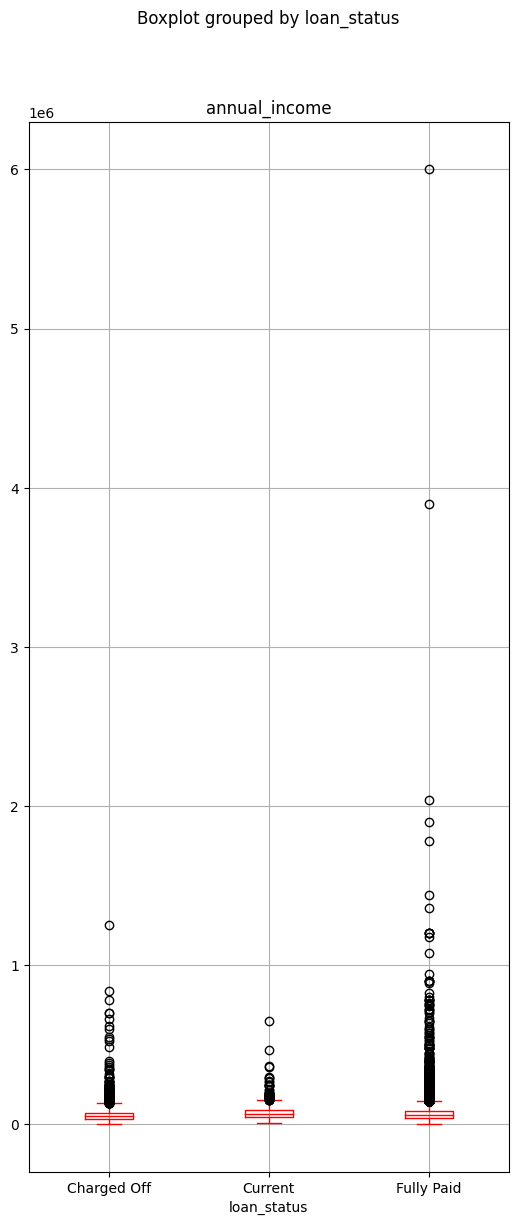

In [72]:
boxplot_income=data1.boxplot(column='annual_income', by='loan_status', grid = True,figsize=(6,14), color='red')
print(boxplot_income)

In [73]:
## Boxplot ##
## Borrowers loan repayment is also dependant on his or her loan amount (i.e loan amount funded to him or her) 
## Making boxplot for checking, relation beetween borrowers loan amount funded & Loan status of repayment.

Axes(0.1,0.15;0.8x0.75)


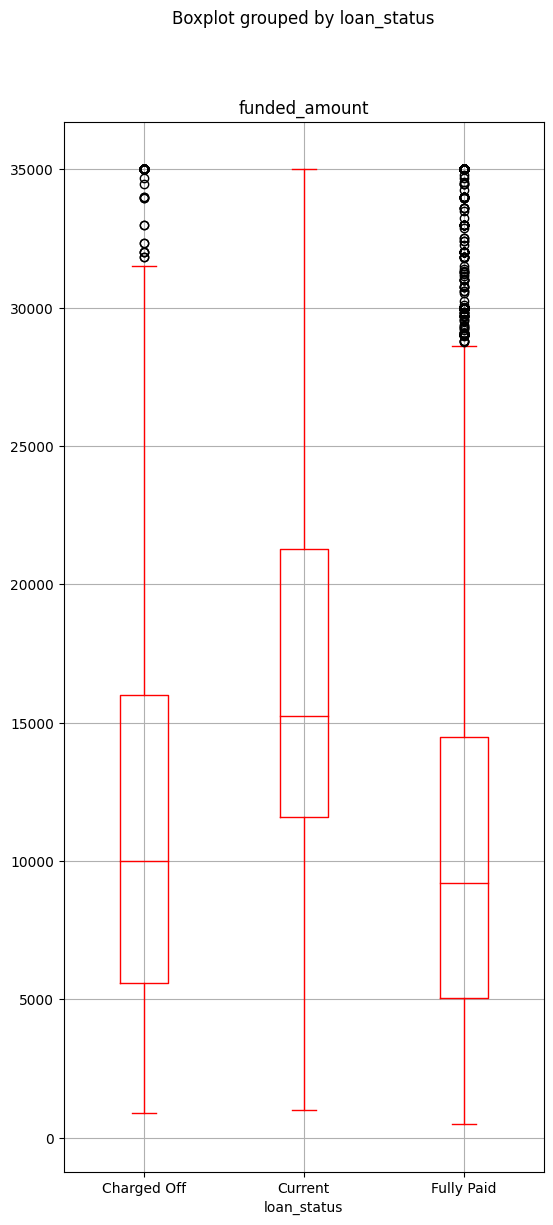

In [74]:
boxplot_fund=data1.boxplot(column='funded_amount', by='loan_status', grid = True, figsize=(6,14), color='red')
print(boxplot_fund)

In [75]:
## Making different dataframes for every loan status category for further analysis

In [76]:
data1['loan_status'].describe()

count          39717
unique             3
top       Fully Paid
freq           32950
Name: loan_status, dtype: object

In [77]:
## Getting all types of loan status (unique values)
data1['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [78]:
## value number counting for each type of load status (unique values)
data1['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [79]:
## Making dataframe for "Fully_paid" loan status category.
fully_paid=data1[(data1['loan_status']=='Fully Paid')]

In [80]:
fully_paid

,loan_id,member_id,loan_amount,funded_amount,funded_amnt_inv,loan_term,interest_rates,installment,grade,sub_grade,home_ownership,annual_income,verification_status,loan_status,pymnt_plan,purpose,bankruptcy_record,application_type
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,RENT,24000.0,Verified,Fully Paid,n,credit_card,0.00000,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,RENT,12252.0,Not Verified,Fully Paid,n,small_business,0.00000,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,RENT,49200.0,Source Verified,Fully Paid,n,other,0.00000,INDIVIDUAL
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,RENT,36000.0,Source Verified,Fully Paid,n,wedding,0.00000,INDIVIDUAL
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,RENT,47004.0,Not Verified,Fully Paid,n,debt_consolidation,0.00000,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,MORTGAGE,110000.0,Not Verified,Fully Paid,n,home_improvement,0.04326,INDIVIDUAL
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,RENT,18000.0,Not Verified,Fully Paid,n,credit_card,0.04326,INDIVIDUAL
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,MORTGAGE,100000.0,Not Verified,Fully Paid,n,debt_consolidation,0.04326,INDIVIDUAL
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,MORTGAGE,200000.0,Not Verified,Fully Paid,n,other,0.04326,INDIVIDUAL


In [81]:
## Making dataframe for "Charged Off" loan status category.
charged_off=data1[(data1['loan_status']=='Charged Off')]

In [82]:
charged_off

,loan_id,member_id,loan_amount,funded_amount,funded_amnt_inv,loan_term,interest_rates,installment,grade,sub_grade,home_ownership,annual_income,verification_status,loan_status,pymnt_plan,purpose,bankruptcy_record,application_type
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,RENT,30000.0,Source Verified,Charged Off,n,car,0.00000,INDIVIDUAL
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,OWN,40000.0,Source Verified,Charged Off,n,small_business,0.00000,INDIVIDUAL
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,RENT,15000.0,Verified,Charged Off,n,other,0.00000,INDIVIDUAL
12,1064687,1298717,9000,9000,9000.0,36 months,13.49%,305.38,C,C1,RENT,30000.0,Source Verified,Charged Off,n,debt_consolidation,0.00000,INDIVIDUAL
14,1069057,1303503,10000,10000,10000.0,36 months,10.65%,325.74,B,B2,RENT,100000.0,Source Verified,Charged Off,n,other,0.00000,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39667,118823,118026,2500,2500,675.0,36 months,12.80%,84.00,D,D4,MORTGAGE,32000.0,Not Verified,Charged Off,n,home_improvement,0.04326,INDIVIDUAL
39668,118533,117783,2500,2500,825.0,36 months,9.64%,80.26,B,B4,MORTGAGE,75000.0,Not Verified,Charged Off,n,home_improvement,0.04326,INDIVIDUAL
39669,118523,118519,6500,6500,225.0,36 months,15.01%,225.37,F,F1,MORTGAGE,213000.0,Not Verified,Charged Off,n,small_business,0.04326,INDIVIDUAL
39678,113179,113093,1000,1000,950.0,36 months,10.59%,32.55,C,C2,MORTGAGE,33990.0,Not Verified,Charged Off,n,wedding,0.04326,INDIVIDUAL


In [83]:
## Making dataframe for "Current" loan status category.
current=data1[(data1['loan_status']=='Current')]

In [84]:
current

,loan_id,member_id,loan_amount,funded_amount,funded_amnt_inv,loan_term,interest_rates,installment,grade,sub_grade,home_ownership,annual_income,verification_status,loan_status,pymnt_plan,purpose,bankruptcy_record,application_type
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,RENT,80000.0,Source Verified,Current,n,other,0.0,INDIVIDUAL
32,1065420,1299514,10000,10000,9975.00000,60 months,15.96%,242.97,C,C5,RENT,29120.0,Verified,Current,n,debt_consolidation,0.0,INDIVIDUAL
39,1069346,1304237,12500,12500,12475.00000,60 months,12.69%,282.44,B,B5,RENT,27000.0,Verified,Current,n,debt_consolidation,0.0,INDIVIDUAL
86,1063958,1297940,14000,14000,13975.00000,60 months,17.27%,349.98,D,D3,RENT,28000.0,Verified,Current,n,other,0.0,INDIVIDUAL
95,1068575,1303001,15300,15300,15275.00000,60 months,22.06%,423.10,F,F4,RENT,85000.0,Verified,Current,n,credit_card,0.0,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15972,725556,920821,10400,10400,10400.00000,60 months,6.00%,218.99,E,E3,MORTGAGE,29000.0,Source Verified,Current,n,credit_card,0.0,INDIVIDUAL
15981,738420,935790,6000,6000,6000.00000,60 months,10.37%,128.58,B,B3,RENT,24000.0,Source Verified,Current,n,car,0.0,INDIVIDUAL
16361,733695,930086,19200,19200,18847.76292,60 months,10.74%,414.97,B,B4,MORTGAGE,100000.0,Verified,Current,n,small_business,0.0,INDIVIDUAL
16609,728422,924106,9350,9350,9350.00000,60 months,10.00%,198.66,B,B2,RENT,66000.0,Not Verified,Current,n,car,0.0,INDIVIDUAL


In [85]:
## Installment Amount of "Fully paid" borrowers ##

<Axes: title={'center': 'Installment Amount of "Fully paid" borrowers'}>

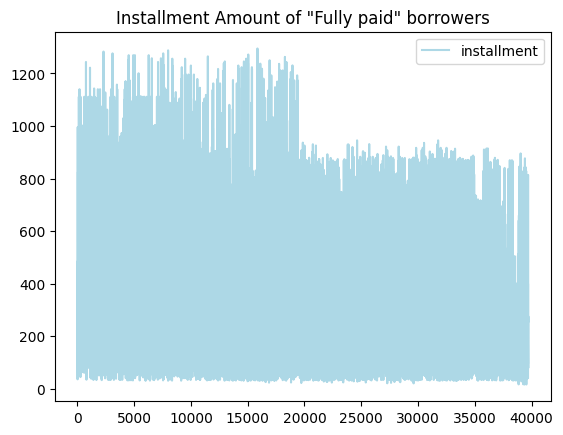

In [86]:
fully_paid.plot(y="installment", kind="line", title='Installment Amount of "Fully paid" borrowers', color='lightblue')

In [87]:
## Installment Amount of "charged_off" borrowers ##

<Axes: title={'center': 'Installment Amount of "charged_off" borrowers'}>

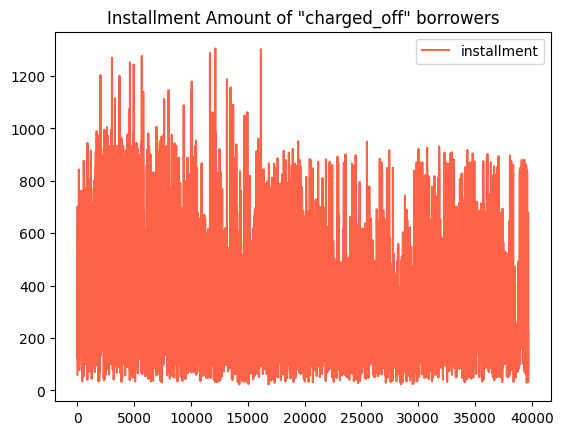

In [88]:
charged_off.plot(y="installment", kind="line", title='Installment Amount of "charged_off" borrowers', color='tomato')

In [89]:
## Installment Amount of "Current" borrowers ##

<Axes: title={'center': 'Installment Amount of "Current" borrowers'}>

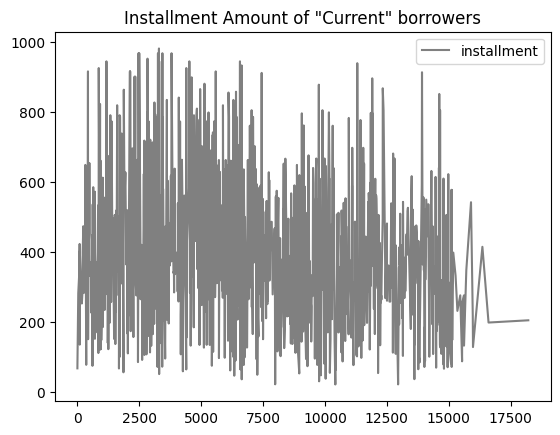

In [90]:
current.plot(y="installment", kind="line", title='Installment Amount of "Current" borrowers', color='grey')

In [91]:
## If income is low and loan repayment installment is high then borrower might fail to pay the loan.
## Checking difference in amount of income and loan repayment installment for each category of loan status
## by using line graphs

In [92]:
fully_paid['monthaly_income']=(fully_paid['annual_income']/12)

<ipython-input-92-43c12a471bbe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fully_paid['monthaly_income']=(fully_paid['annual_income']/12)


<function matplotlib.pyplot.show(close=None, block=None)>

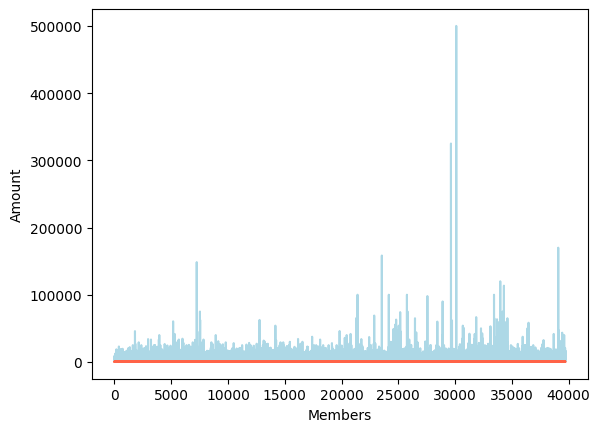

In [93]:
plt.plot(fully_paid['monthaly_income'], color='lightblue')
plt.plot(fully_paid['installment'], color='tomato')
plt.xlabel('Members')
plt.ylabel('Amount')
plt.show

In [94]:
charged_off['monthaly_income']=(charged_off['annual_income']/12)

<ipython-input-94-785fcdc232f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off['monthaly_income']=(charged_off['annual_income']/12)


<function matplotlib.pyplot.show(close=None, block=None)>

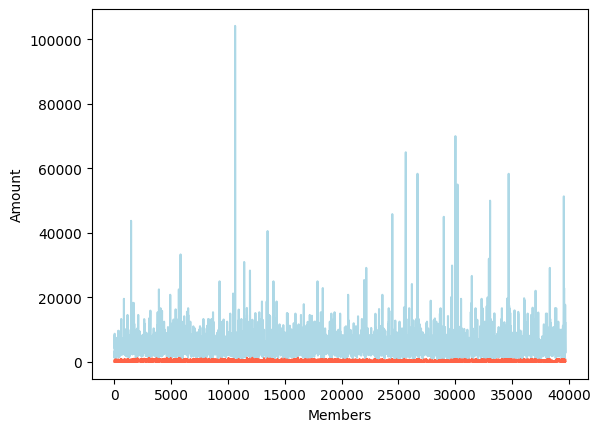

In [95]:
plt.plot(charged_off['monthaly_income'], color='lightblue')
plt.plot(charged_off['installment'], color='tomato')
plt.xlabel('Members')
plt.ylabel('Amount')
plt.show

In [96]:
current['monthaly_income']=(current['annual_income']/12)

<ipython-input-96-125362212c6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current['monthaly_income']=(current['annual_income']/12)


<function matplotlib.pyplot.show(close=None, block=None)>

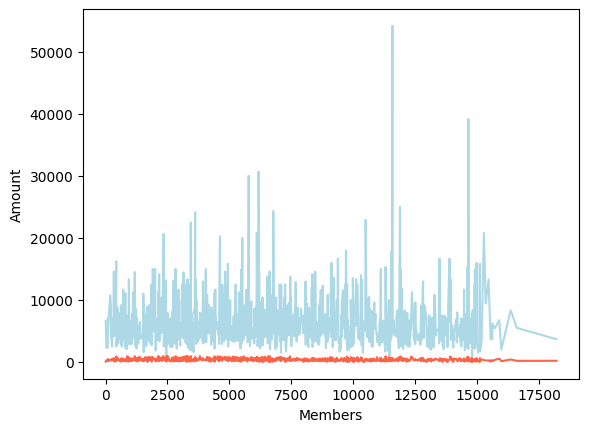

In [97]:
plt.plot(current['monthaly_income'], color='lightblue')
plt.plot(current['installment'], color='tomato')
plt.xlabel('Members')
plt.ylabel('Amount')
plt.show